# Installing the yfinance Package

In [3]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.0 MB/s eta 0:00:03
     ---------- ----------------------------- 0.8/3.0 MB 1.2 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.2 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.0 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 972.7 kB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.0 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.1 MB/s eta 0:00:02
     ------------------------------- -------- 2.4/3.0 MB 1.2 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 1.3 MB/s eta 0:00:00
  Ins

# Setting up Start and End date to get Data for Stock Data

In [9]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month,end.day)


# Fetching the Dataset for EnGro Corporation Limited from Yahoo Finanace

In [19]:
stock = 'ENGRO.KA'
engro = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [21]:
engro.head()

Price,Close,High,Low,Open,Volume
Ticker,ENGRO.KA,ENGRO.KA,ENGRO.KA,ENGRO.KA,ENGRO.KA
Date,,,,,
2015-02-09,93.355942,94.137310,90.432835,90.741020,14137640
2015-02-10,91.631325,93.857124,90.370556,93.857124,8591880
2015-02-11,87.568878,92.969948,87.052123,92.456302,12872200
2015-02-12,85.470711,86.541580,83.272928,86.230280,10957540
2015-02-13,87.347832,88.406255,83.587323,85.887830,9318100


In [23]:
engro.tail()

Price,Close,High,Low,Open,Volume
Ticker,ENGRO.KA,ENGRO.KA,ENGRO.KA,ENGRO.KA,ENGRO.KA
Date,,,,,
2025-01-07,485.380005,485.380005,485.380005,485.380005,0
2025-01-08,485.380005,485.380005,485.380005,485.380005,0
2025-01-09,485.380005,485.380005,485.380005,485.380005,0
2025-01-10,485.380005,485.380005,485.380005,485.380005,0
2025-01-13,485.380005,485.380005,485.380005,485.380005,0


# Number of Rows and Columns in the Dataset

In [25]:
engro.shape

(2578, 5)

# Descriptive Statistics of the Dataset 

In [29]:
engro.describe()

Price,Close,High,Low,Open,Volume
Ticker,ENGRO.KA,ENGRO.KA,ENGRO.KA,ENGRO.KA,ENGRO.KA
count,2578.000000,2578.000000,2578.000000,2578.000000,2.578000e+03
mean,163.364912,165.306295,161.692630,163.516859,1.136852e+06
std,68.994949,69.985768,68.143186,68.930760,1.653431e+06
min,76.165924,79.381656,76.150359,76.268641,0.000000e+00
25%,116.002457,117.500032,114.754376,116.170365,2.761242e+05
50%,150.137299,151.752060,148.326274,150.359014,6.012615e+05
75%,171.264393,173.211301,170.288013,171.643758,1.341575e+06
max,485.380005,496.000000,485.380005,485.380005,2.575848e+07


# Basic Information of the Dataset

In [37]:
engro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2578 entries, 2015-02-09 to 2025-01-13
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, ENGRO.KA)   2578 non-null   float64
 1   (High, ENGRO.KA)    2578 non-null   float64
 2   (Low, ENGRO.KA)     2578 non-null   float64
 3   (Open, ENGRO.KA)    2578 non-null   float64
 4   (Volume, ENGRO.KA)  2578 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 120.8 KB


# Checking Null Values in the Dataset

In [44]:
engro.isnull().sum()

Price   Ticker  
Close   ENGRO.KA    0
High    ENGRO.KA    0
Low     ENGRO.KA    0
Open    ENGRO.KA    0
Volume  ENGRO.KA    0
dtype: int64

# Drawing some Graphs to get the overall understanding of the Dataset

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a Function to Draw Graphs for all the Six Columns

In [72]:
def plot_graph (figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.title(f'{column_name} of EnGro Corporation Limited')

In [80]:
engro.columns

MultiIndex([( 'Close', 'ENGRO.KA'),
            (  'High', 'ENGRO.KA'),
            (   'Low', 'ENGRO.KA'),
            (  'Open', 'ENGRO.KA'),
            ('Volume', 'ENGRO.KA')],
           names=['Price', 'Ticker'])

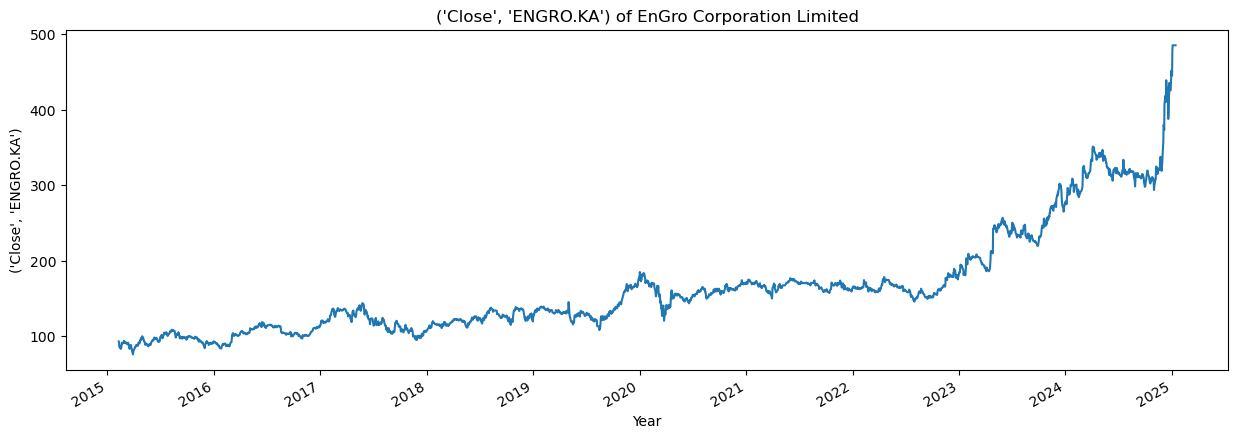

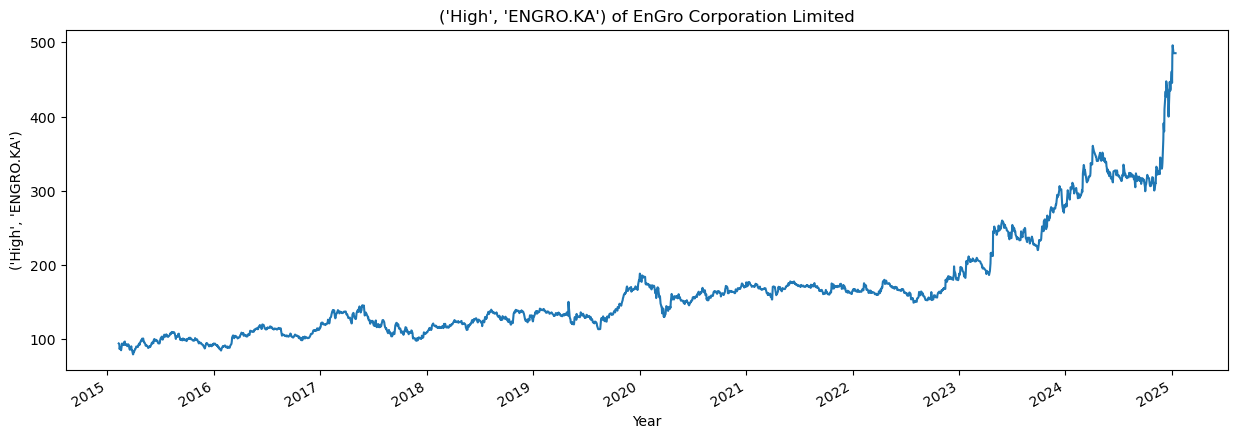

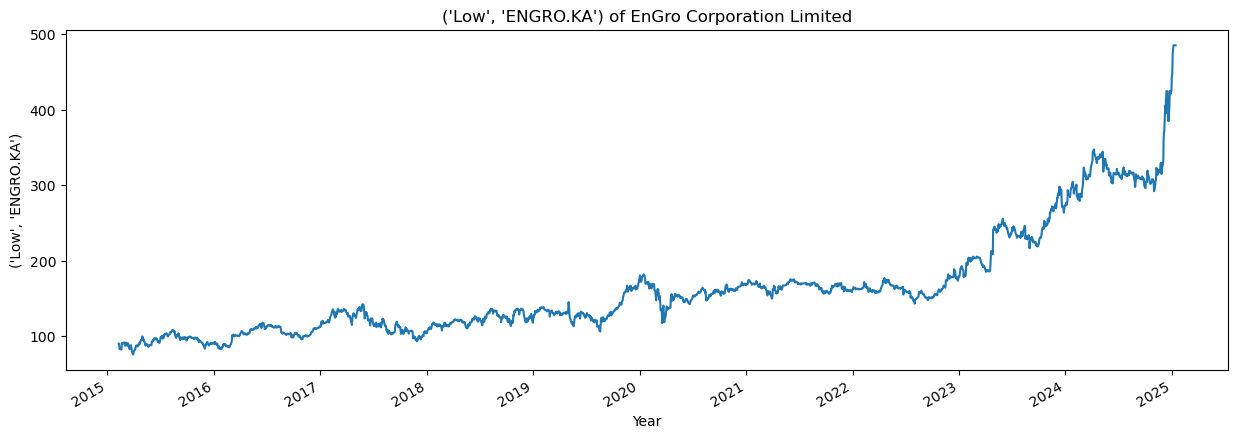

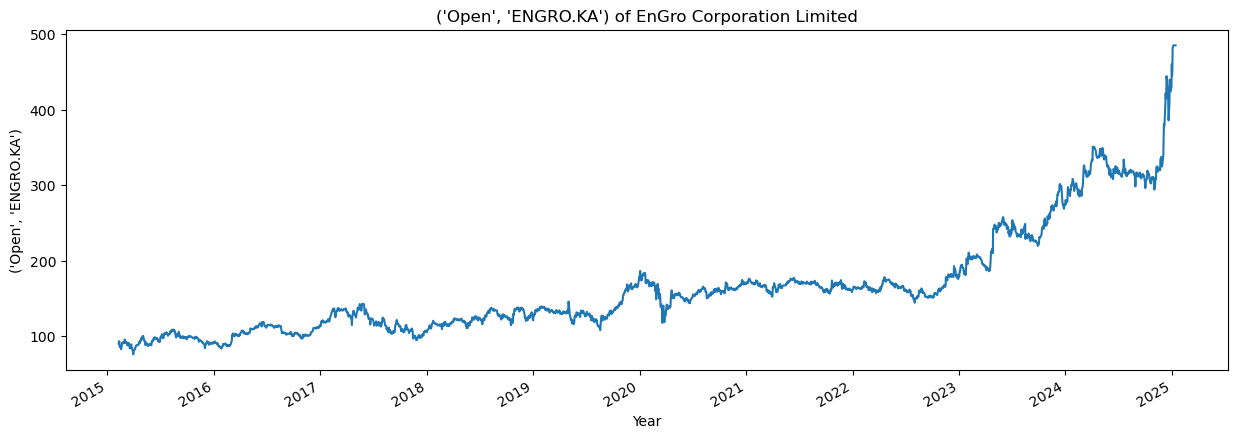

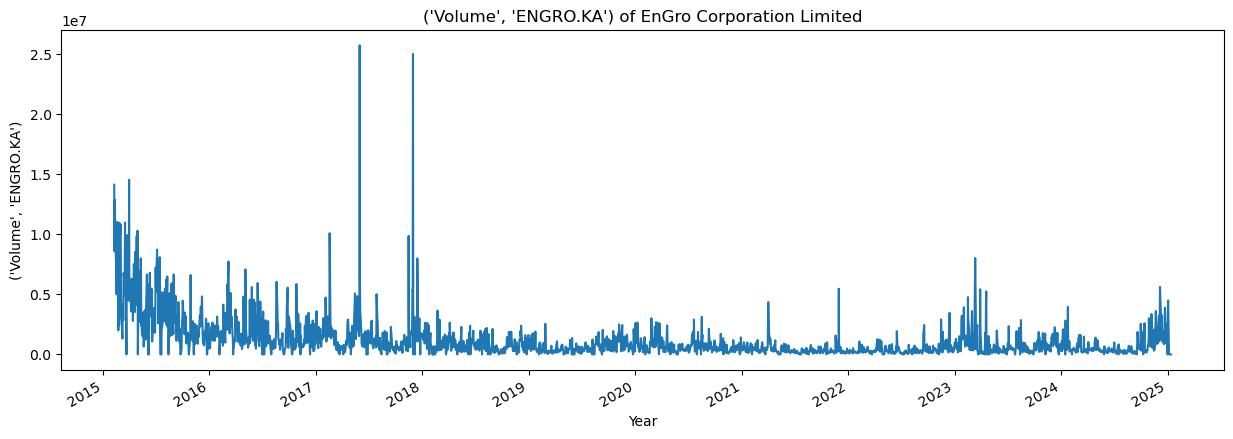

In [76]:
for column in engro.columns:
    plot_graph((15,5),engro[column],column)

# Count of included Days for Each Year (2015-2025)

In [86]:
for i in range(2015,2026):
    print(i,list(engro.index.year).count(i))

2015 234
2016 261
2017 260
2018 260
2019 261
2020 262
2021 261
2022 260
2023 260
2024 250
2025 9


# Calculating Moving Average for 250 Days for a year 2024

In [89]:
engro['MA_for_250_Days']= engro['Close'].rolling(250).mean()

In [95]:
engro['MA_for_250_Days']

Date
2015-02-09           NaN
2015-02-10           NaN
2015-02-11           NaN
2015-02-12           NaN
2015-02-13           NaN
                 ...    
2025-01-07    326.769629
2025-01-08    327.540788
2025-01-09    328.296298
2025-01-10    329.072400
2025-01-13    329.862849
Name: MA_for_250_Days, Length: 2578, dtype: float64

# Plotting the Graph for Moving Average for 250 Days vs Year

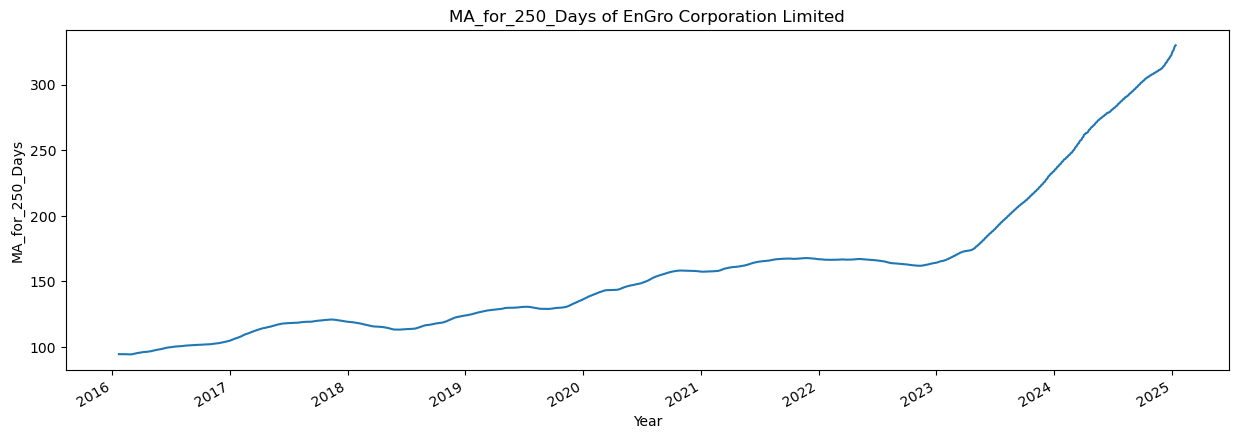

In [99]:
plot_graph((15,5),engro['MA_for_250_Days'],'MA_for_250_Days')

<Figure size 640x480 with 0 Axes>

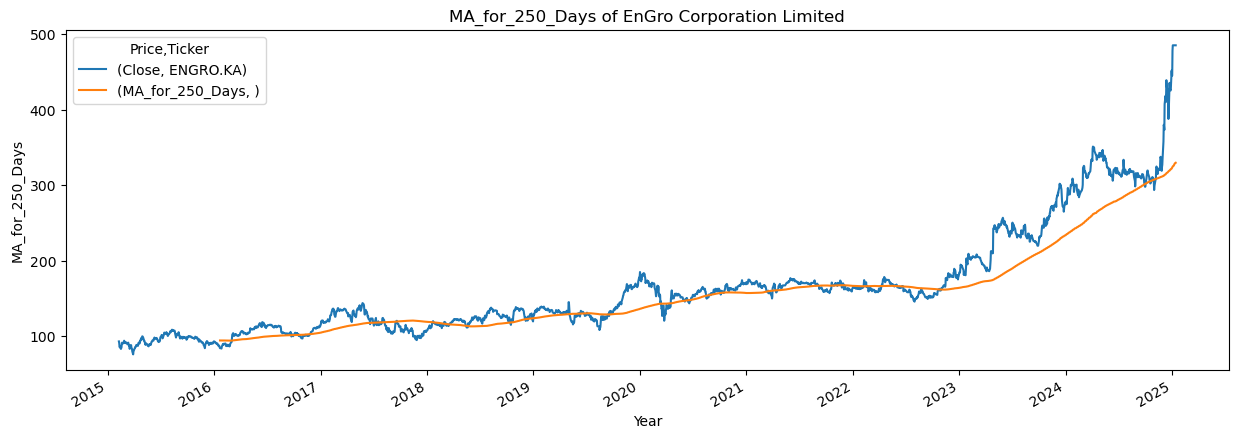

In [101]:
plot_graph((15,5),engro[['Close','MA_for_250_Days']],'MA_for_250_Days')

# Calculating Moving Average for 100 Days for a year 2024

In [104]:
engro['MA_for_100_Days']= engro['Close'].rolling(100).mean()

In [106]:
engro['MA_for_100_Days']

Date
2015-02-09           NaN
2015-02-10           NaN
2015-02-11           NaN
2015-02-12           NaN
2015-02-13           NaN
                 ...    
2025-01-07    342.074362
2025-01-08    343.744303
2025-01-09    345.412807
2025-01-10    347.121813
2025-01-13    348.863566
Name: MA_for_100_Days, Length: 2578, dtype: float64

# Plotting the Graph for Moving Average for 100 Days vs Year

In [237]:
engro['MA_for_100_Days']= engro['Close'].rolling(100).mean()

<Figure size 640x480 with 0 Axes>

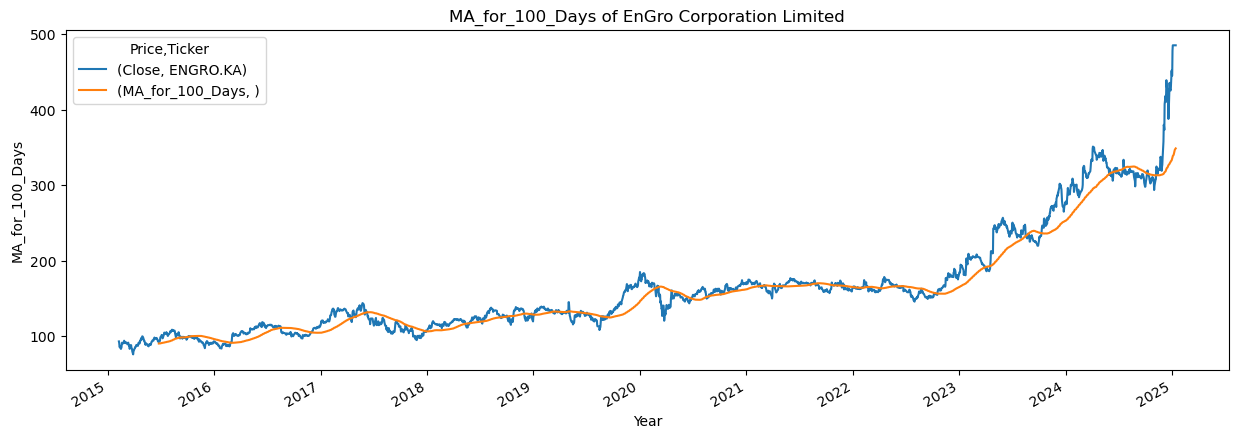

In [113]:
plot_graph((15,5),engro[['Close','MA_for_100_Days']],'MA_for_100_Days')

# Comparative Graph for Both 100 and 250 Days Moving Average

<Figure size 640x480 with 0 Axes>

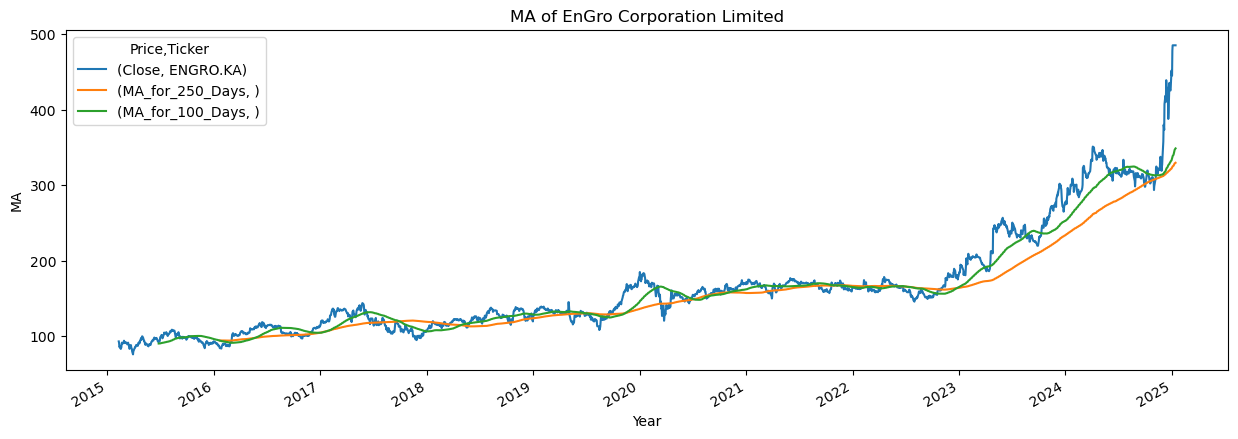

In [116]:
plot_graph((15,5),engro[['Close','MA_for_250_Days','MA_for_100_Days']],'MA')

# Preprocessing on Input Data

In [136]:
Close_Price = engro[['Close']]

In [138]:
max(Close_Price.values), min(Close_Price.values)

(array([485.38000488]), array([76.16592407]))

# Normalization of the Data (Converting into range of 0 and 1)

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_Price)

In [143]:
scaled_data

array([[0.0420074 ],
       [0.03779293],
       [0.0278655 ],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

In [145]:
len(scaled_data)

2578

In [147]:
engro.shape

(2578, 8)

# From Scaled Data extracted X and Y Data

In [150]:
import numpy as np

In [152]:
x = []
y = []
for i in range(100,len(scaled_data)):
    x.append(scaled_data[i-100:i])
    y.append(scaled_data[i])
x,y = np.array(x), np.array(y)

In [154]:
x[0],y[0]

(array([[0.0420074 ],
        [0.03779293],
        [0.0278655 ],
        [0.02273819],
        [0.02732532],
        [0.01769452],
        [0.02056241],
        [0.02302717],
        [0.03347966],
        [0.03808965],
        [0.03524454],
        [0.03750386],
        [0.03688769],
        [0.03796789],
        [0.04428189],
        [0.0366062 ],
        [0.03657574],
        [0.03662146],
        [0.03885799],
        [0.03878194],
        [0.03582267],
        [0.03261241],
        [0.03425557],
        [0.03569338],
        [0.03802889],
        [0.02731009],
        [0.02774372],
        [0.01799882],
        [0.0224034 ],
        [0.02986619],
        [0.02986619],
        [0.02155146],
        [0.019893  ],
        [0.01719243],
        [0.00975254],
        [0.        ],
        [0.00930368],
        [0.01204991],
        [0.01465919],
        [0.01675883],
        [0.02347604],
        [0.0231642 ],
        [0.0252561 ],
        [0.0285755 ],
        [0.03040509],
        [0

In [156]:
int(len(x)*0.7)

1734

In [162]:
engro.shape[0]-100-int(len(x)*0.7)

744

# Splitting Training and Test Dataset

In [231]:
splitting_len = int(len(x)*0.7)
x_train = x[:splitting_len]
y_train = y[:splitting_len]

x_test = x[splitting_len:]
y_test = y[splitting_len:]

In [233]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1734, 100, 1)
(1734, 1)
(744, 100, 1)
(744, 1)


# Building Neural Network to Predict the Closing Price

In [179]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [183]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [189]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - loss: 5.0361e-04
Epoch 2/2
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - loss: 1.0066e-04


In [191]:
prd = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


In [193]:
prd

array([[0.23252192],
       [0.23107226],
       [0.22886662],
       [0.22675768],
       [0.22103667],
       [0.21920739],
       [0.2222489 ],
       [0.2254806 ],
       [0.22361986],
       [0.22261252],
       [0.22387294],
       [0.22139312],
       [0.21841931],
       [0.2186854 ],
       [0.22022459],
       [0.22042577],
       [0.21979879],
       [0.21991073],
       [0.21955371],
       [0.2186841 ],
       [0.21574603],
       [0.21343277],
       [0.21403879],
       [0.21500568],
       [0.214847  ],
       [0.21436118],
       [0.2133259 ],
       [0.21267761],
       [0.21327104],
       [0.21622288],
       [0.2206889 ],
       [0.22003993],
       [0.21836914],
       [0.2213105 ],
       [0.22250934],
       [0.22424217],
       [0.23044538],
       [0.23423709],
       [0.23637614],
       [0.24264582],
       [0.24930678],
       [0.25141343],
       [0.25629386],
       [0.25839856],
       [0.25340447],
       [0.2479638 ],
       [0.24830337],
       [0.250

In [195]:
inv_prd = scaler.inverse_transform(prd)
inv_prd

array([[171.31717],
       [170.72394],
       [169.82137],
       [168.95836],
       [166.61725],
       [165.86867],
       [167.1133 ],
       [168.43576],
       [167.67432],
       [167.2621 ],
       [167.77788],
       [166.7631 ],
       [165.54619],
       [165.65506],
       [166.28493],
       [166.36725],
       [166.11067],
       [166.15648],
       [166.01039],
       [165.65454],
       [164.45224],
       [163.50562],
       [163.75362],
       [164.14928],
       [164.08435],
       [163.88553],
       [163.46188],
       [163.1966 ],
       [163.43944],
       [164.64737],
       [166.47493],
       [166.20937],
       [165.52565],
       [166.7293 ],
       [167.21988],
       [167.92897],
       [170.46742],
       [172.01904],
       [172.89436],
       [175.46   ],
       [178.18576],
       [179.04784],
       [181.04498],
       [181.90625],
       [179.86261],
       [177.6362 ],
       [177.77516],
       [178.71999],
       [179.29626],
       [179.47702],


In [197]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[166.10798645],
       [164.32939148],
       [163.5422821 ],
       [159.45040894],
       [161.18089294],
       [163.99894714],
       [164.43756104],
       [161.19892883],
       [162.17835999],
       [163.71653748],
       [160.57402039],
       [159.84698486],
       [161.64355469],
       [162.28648376],
       [161.46932983],
       [161.0667572 ],
       [161.64958191],
       [161.1791687 ],
       [160.68463135],
       [158.6280365 ],
       [158.3868103 ],
       [159.91867065],
       [159.91867065],
       [159.21304321],
       [159.06829834],
       [158.47723389],
       [158.52549744],
       [159.30351257],
       [161.39022827],
       [163.47094727],
       [160.50369263],
       [160.31672668],
       [163.97755432],
       [162.82563782],
       [164.07406616],
       [168.65760803],
       [168.2414856 ],
       [168.76016235],
       [173.64529419],
       [175.85264587],
       [174.48965454],
       [178.65707397],
       [177.77651978],
       [172

In [199]:
rmse = np.sqrt(np.mean((inv_prd - inv_y_test)**2))

In [201]:
rmse

9.78729286953422

In [205]:
import pandas as pd

In [207]:
ploting_data = pd.DataFrame(
 {
  'orginal_test_data': inv_y_test.reshape(-1),
     'prd': inv_prd.reshape(-1)
 },
    index = engro.index[splitting_len+100:]
)
ploting_data.head()

,orginal_test_data,prd
Date,,
2022-02-21,166.107986,171.317169
2022-02-22,164.329391,170.723938
2022-02-23,163.542282,169.821365
2022-02-24,159.450409,168.958359
2022-02-25,161.180893,166.617249


<Figure size 640x480 with 0 Axes>

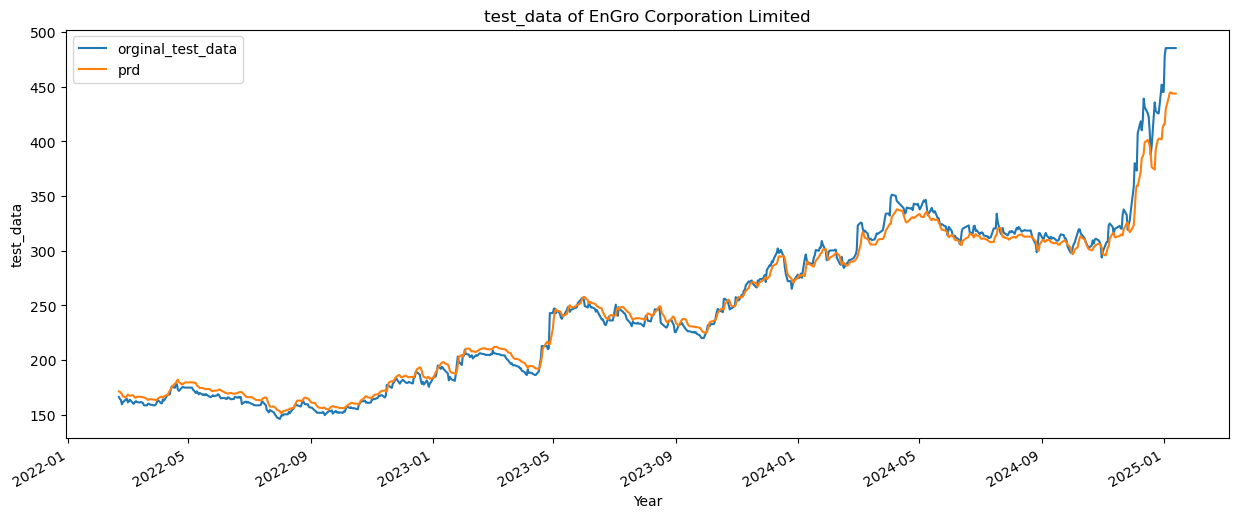

In [235]:
plot_graph((15,6),ploting_data,'test_data')

<Figure size 640x480 with 0 Axes>

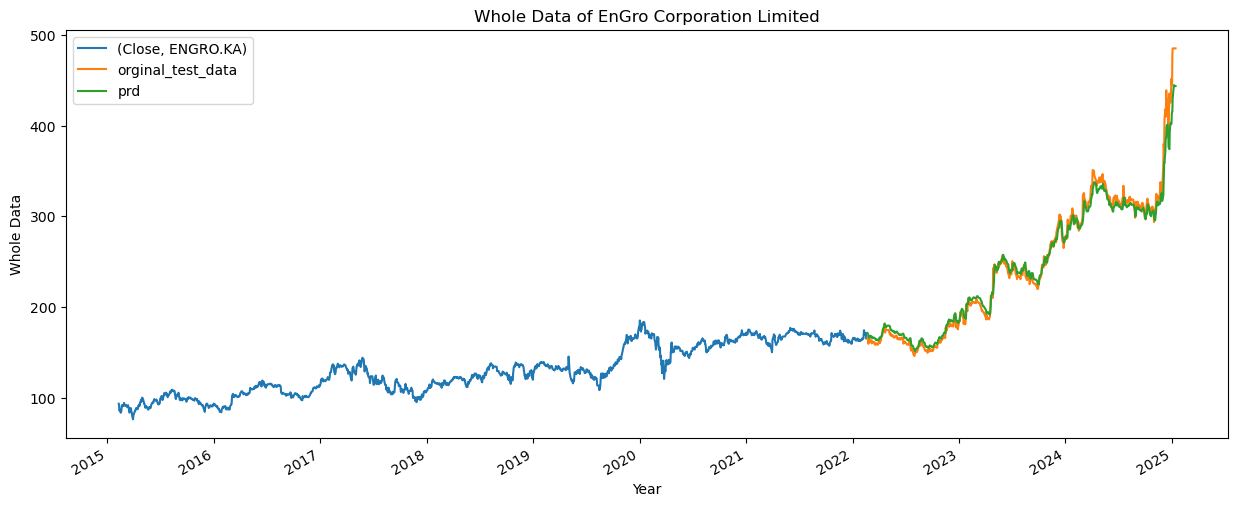

In [219]:
plot_graph((15,6), pd.concat([Close_Price[:splitting_len+100], ploting_data], axis=0), 'Whole Data')

In [229]:
model.save('Latest_stock_price_model.keras')

In [241]:
!pip install gradio

   ---------------------------------------- 0.0/57.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/57.8 MB 2.8 MB/s eta 0:00:21
    --------------------------------------- 0.8/57.8 MB 2.6 MB/s eta 0:00:23
    --------------------------------------- 1.3/57.8 MB 2.5 MB/s eta 0:00:23
   - -------------------------------------- 1.8/57.8 MB 2.4 MB/s eta 0:00:24
   - -------------------------------------- 2.6/57.8 MB 2.4 MB/s eta 0:00:24
   -- ------------------------------------- 3.1/57.8 MB 2.5 MB/s eta 0:00:23
   -- ------------------------------------- 3.7/57.8 MB 2.5 MB/s eta 0:00:22
   -- ------------------------------------- 4.2/57.8 MB 2.5 MB/s eta 0:00:22
   --- ------------------------------------ 4.7/57.8 MB 2.5 MB/s eta 0:00:21
   --- ------------------------------------ 5.2/57.8 MB 2.5 MB/s eta 0:00:21
   --- ------------------------------------ 5.8/57.8 MB 2.6 MB/s eta 0:00:21
   ---- ----------------------------------- 6.6/57.8 MB 2.6 MB/s eta 0:00:20
   ---

In [243]:
import gradio as gr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from keras.models import load_model
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Load Pre-Trained Model
model_path = "./Latest_stock_price_model.keras"  # Adjust path if needed
model = load_model(model_path)

# Function to Predict Stock Prices
def predict_stock(stock):
    # Set Start and End Dates for Historical Data
    end = datetime.now()
    start = datetime(end.year - 10, end.month, end.day)

    # Fetch Stock Data
    engro = yf.download(stock, start, end)

    if engro.empty:
        return "⚠️ No data found for this stock ticker! Please try another.", None

    # Moving Averages
    engro['MA_for_250_days'] = engro['Close'].rolling(250).mean()
    engro['MA_for_100_days'] = engro['Close'].rolling(100).mean()

    # Scale the Data for Model Prediction
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(engro[['Close']])

    # Prepare Data for LSTM
    x_test, y_test = [], []
    for i in range(100, len(scaled_data)):
        x_test.append(scaled_data[i-100:i])
        y_test.append(scaled_data[i])

    x_test, y_test = np.array(x_test), np.array(y_test)

    # Make Predictions
    predictions = model.predict(x_test)

    # Inverse Transform Predictions
    inv_pred = scaler.inverse_transform(predictions)
    inv_y_test = scaler.inverse_transform(y_test)

    # Create DataFrame for Display
    plotting_data = pd.DataFrame(
        {'Original Test Data': inv_y_test.flatten(), 'Predicted': inv_pred.flatten()},
        index=engro.index[-len(inv_pred):]
    )

    # Plot Actual vs Predicted Prices
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(plotting_data['Original Test Data'], label="Actual Prices", color="blue")
    ax.plot(plotting_data['Predicted'], label="Predicted Prices", color="orange")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_title(f"📉 Actual vs Predicted Prices for {stock}")
    ax.legend()

    return plotting_data.tail(10), fig  # Returns both data table and plot

# Create Gradio Interface
interface = gr.Interface(
    fn=predict_stock,
    inputs=gr.Textbox(label="Enter Stock ID (e.g., ENGRO.KA)"),
    outputs=[
        gr.Dataframe(label="📊 Original vs Predicted Stock Prices"),
        gr.Plot(label="📈 Stock Price Prediction Graph")
    ],
    title="📈 Stock Price Predictor App",
    description="Enter a stock ticker to fetch its historical data and predict future prices using an LSTM model."
)

# Launch Gradio App
interface.launch()


D:\ Anacona Navigator\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
